In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:

df = pd.read_csv("Myntra Fasion Clothing.csv")


C:\Users\acer\AppData\Local\Temp\ipykernel_19656\2102810012.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Myntra Fasion Clothing.csv")


In [4]:
print(df.isnull().sum())
df = df.dropna(subset=['Ratings', 'DiscountPrice (in Rs)', 'DiscountOffer'])  # Adjust as needed

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64


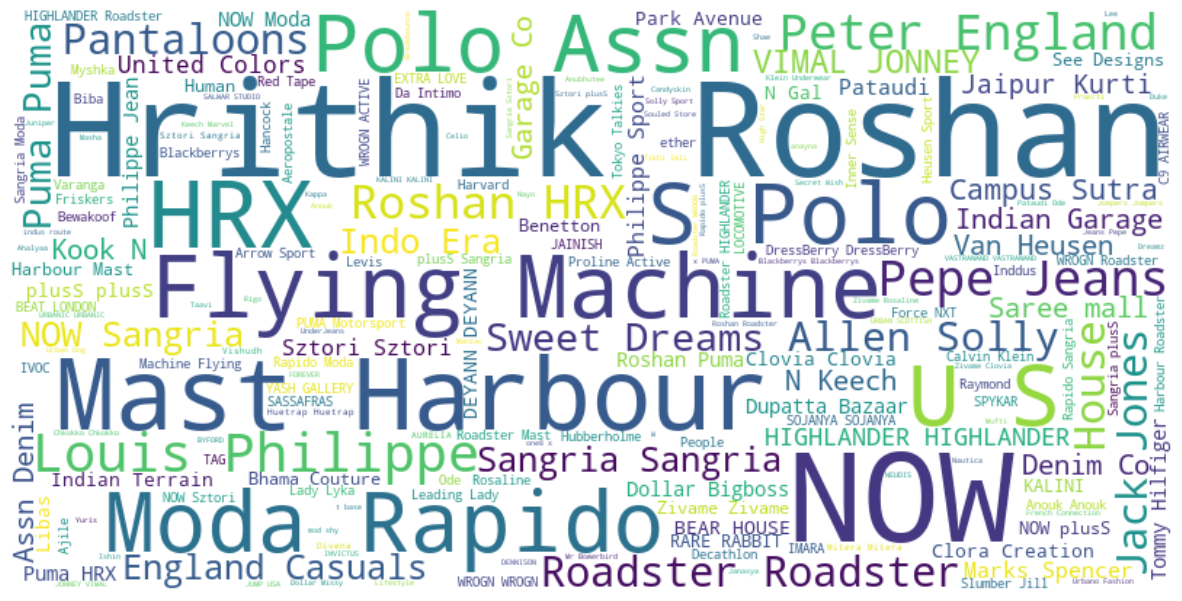

In [5]:
text = " ".join(df["BrandName"].dropna().astype(str).tolist())
wc = WordCloud(stopwords=set(STOPWORDS), background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
# Convert 'Discount' like "(70% OFF)" to numeric 70
df['Ratings'] = df['Ratings'].astype(float)
df['OriginalPrice (in Rs)'] = df['OriginalPrice (in Rs)'].astype(float)

# Example scoring: 70% rating + 30% price factor (lower price = better)
df['Score'] = df['Ratings'] * 0.7 + (1 - df['OriginalPrice (in Rs)'] / df['OriginalPrice (in Rs)'].max()) * 0.3
top_items = df.sort_values('Score', ascending=False).head(10)

In [7]:
from IPython.display import display
display(top_items[['BrandName', 'Ratings', 'OriginalPrice (in Rs)', 'Score']])

,BrandName,Ratings,OriginalPrice (in Rs),Score
138995,Jack & Jones,5.0,249.0,3.797953
183148,DIXCY SCOTT MAXIMUS,5.0,270.0,3.797781
155052,Jack & Jones,5.0,279.0,3.797707
165454,Puma,5.0,299.0,3.797542
138978,Mint & Oak,5.0,350.0,3.797123
165437,N2S NEXT2SKIN,5.0,390.0,3.796795
121313,Mint & Oak,5.0,399.0,3.796721
165419,Mint & Oak,5.0,399.0,3.796721
165425,Dynamocks,5.0,399.0,3.796721
165417,XYXX,5.0,399.0,3.796721


In [8]:
print(df.shape)
print(df['Category'].unique())
print(df['Individual_category'].unique())
print(df['category_by_Gender'].unique())

(117541, 14)
['Bottom Wear' 'Topwear' 'Lingerie & Sleep Wear' 'Sports Wear'
 'Indian Wear' 'Plus Size' 'Inner Wear &  Sleep Wear' 'Western']
['jeans' 'track-pants' 'shirts' 'shapewear' 'trousers' 'tights'
 'kurta-sets' 'kurtas' 'bath-robe' 'socks' 'tshirts' 'tops' 'dresses'
 'briefs' 'sarees' 'kurtis' 'bra' 'night-suits' 'jackets' 'lounge-pants'
 'palazzos' 'stockings' 'shorts' 'boxers' 'trunk' 'sweatshirts' 'dupatta'
 'tunics' 'sweaters' 'skirts' 'thermal-tops' 'nightdress' 'pyjamas'
 'capris' 'sports-sandals' 'tracksuits' 'nehru-jackets' 'lounge-tshirts'
 'lounge-shorts' 'lehenga-choli' 'baby-dolls' 'innerwear-vests' 'leggings'
 'camisoles' 'thermal-set' 'jeggings' 'blazers' 'saree-blouse' 'churidar'
 'dress-material' 'boots' 'jumpsuit' 'lingerie-set' 'sherwani' 'co-ords'
 'flats' 'thermal-bottoms' 'swimwear' 'patiala' 'harem-pants'
 'patiala-and-dupatta' 'lingerie-accessories' 'salwar' 'saree-accessories'
 'suits' 'dhotis' 'shawl' 'rain-jacket' 'coats' 'outdoor-masks' 'stoles'
 'clo

In [10]:
from IPython.display import display, HTML
import ipywidgets as widgets

def show_category(cat):
    df_filtered = df[df['Individual_category'].str.contains(cat, case=False, na=False)].head(10)

    if df_filtered.empty:
        display(HTML(f"<h3 style='color:red;'>No products found for: {cat}</h3>"))
        return

    # Make URLs clickable
    df_filtered['URL'] = df_filtered['URL'].apply(lambda x: f'<a href="{x}" target="_blank">View Product</a>')

    display(HTML(f"<h3>Showing {len(df_filtered)} {cat} products</h3>"))
    display(HTML(df_filtered.to_html(escape=False, index=False)))

print("✅ Function loaded. Use the dropdown below to try it.")
# Dropdown widget (auto-detect categories from dataset)
categories = sorted(df['Individual_category'].dropna().unique())

dropdown = widgets.Dropdown(
    options=categories,
    description='Category:',
    value=categories[0]  # default first category
)

# Connect dropdown to function
widgets.interact(show_category, cat=dropdown);

✅ Function loaded. Use the dropdown below to try it.


interactive(children=(Dropdown(description='Category:', options=('baby-dolls', 'bath-robe', 'blazers', 'boots'…